In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

In [256]:
train_data = pd.read_csv('fashion-mnist_train.csv')

In [257]:
test_data = pd.read_csv('fashion-mnist_test.csv')

In [258]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
training = np.array(train_data, dtype = 'float32')

In [261]:
testing = np.array(test_data, dtype = 'float32')

In [262]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

9.0

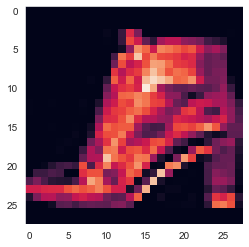

In [263]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [264]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [266]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [267]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [268]:
cnn_model = Sequential()


In [269]:
cnn_model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))

In [270]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [271]:
cnn_model.add(Dropout(0.25))

In [272]:
cnn_model.add(Flatten())

In [273]:
cnn_model.add(Dense(32, activation = 'relu'))

In [274]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [275]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [276]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs= epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/20
94/94 [==============================] - 3s 36ms/step - loss: 1.3486 - accuracy: 0.5404 - val_loss: 0.7430 - val_accuracy: 0.7389
Epoch 2/20
94/94 [==============================] - 3s 37ms/step - loss: 0.6930 - accuracy: 0.7484 - val_loss: 0.6099 - val_accuracy: 0.7736
Epoch 3/20
94/94 [==============================] - 4s 37ms/step - loss: 0.6044 - accuracy: 0.7778 - val_loss: 0.5455 - val_accuracy: 0.8023
Epoch 4/20
94/94 [==============================] - 3s 34ms/step - loss: 0.5590 - accuracy: 0.7952 - val_loss: 0.5210 - val_accuracy: 0.8144
Epoch 5/20
94/94 [==============================] - 4s 40ms/step - loss: 0.5331 - accuracy: 0.8037 - val_loss: 0.4916 - val_accuracy: 0.8246
Epoch 6/20
94/94 [==============================] - 3s 35ms/step - loss: 0.5148 - accuracy: 0.8106 - val_loss: 0.4872 - val_accuracy: 0.8224
Epoch 7/20
94/94 [==============================] - 4s 37ms/step - loss: 0.4994 - accuracy: 0.8164 - val_loss: 0.4650 - val_accuracy: 0.8358
Epoch 8/20
94

In [277]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8604
Test Accuracy : 0.860


In [278]:
predicted_classes = cnn_model.predict_classes(X_test)

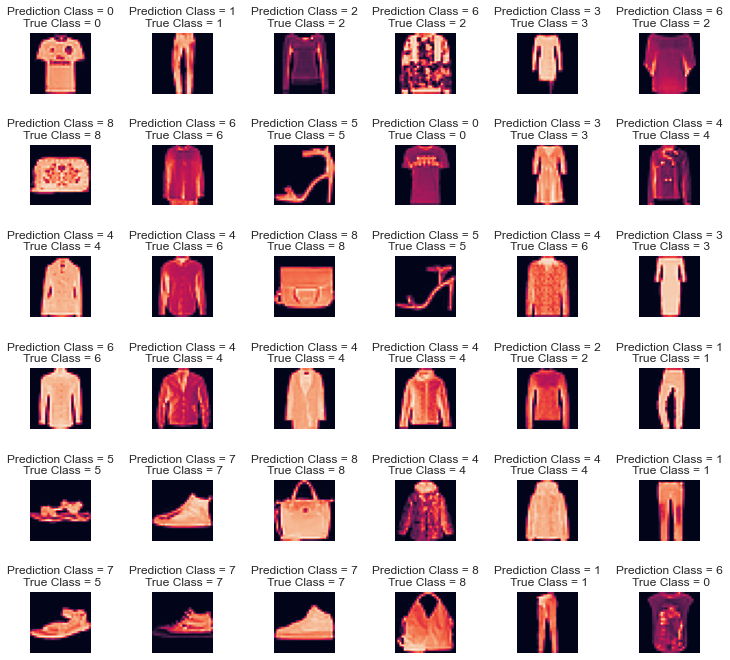

In [279]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):    
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.0f}\n True Class = {:0.0f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)


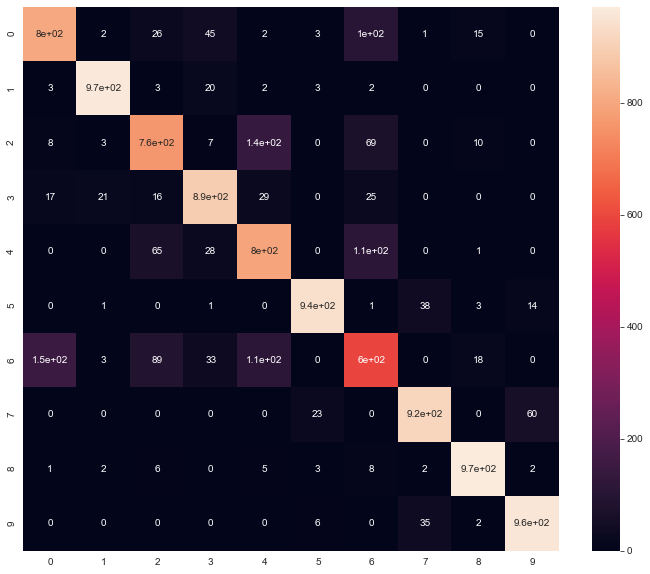

In [280]:
from sklearn.metrics import confusion_matrix,classification_report
a = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(12,10))
sns.heatmap(a, annot=True)

In [281]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.80      0.81      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.79      0.77      0.78      1000
     Class 3       0.87      0.89      0.88      1000
     Class 4       0.73      0.80      0.76      1000
     Class 5       0.96      0.94      0.95      1000
     Class 6       0.65      0.59      0.62      1000
     Class 7       0.92      0.92      0.92      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.93      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [282]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot